## Heart Disease

### Import packages

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


### Load dataset

In [154]:
heart_disease = pd.read_csv('../datasets/heart-disease.csv')

heart_disease.info()

heart_disease.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Data Processing

In [155]:
# Check Missiong Values
heart_disease.isnull().sum() # No missing values
heart_disease.dropna(inplace=True)

print("Original shape: ", heart_disease.shape)

# Check unique values
heart_disease.nunique()

# Check for duplicates
heart_disease.duplicated().sum()
heart_disease_cleaned = heart_disease.drop_duplicates(inplace=False)

# Reset the index
heart_disease_cleaned.reset_index(drop=True, inplace=True)

print("Shape after removal: ", heart_disease_cleaned.shape)

Original shape:  (1025, 14)
Shape after removal:  (302, 14)


### Check for outliers

In [156]:
def find_outliers(df):
    outliers = heart_disease.select_dtypes(include=[np.number]).copy()
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers

outliers = find_outliers(heart_disease_cleaned)

print(outliers)

# Find outliers using z-score
# from scipy import stats
# z = np.abs(stats.zscore(heart_disease_cleaned))
# print(z)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1     NaN  NaN NaN       NaN   NaN  1.0      NaN      NaN    NaN      NaN   
2     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
3     NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
4     NaN  NaN NaN       NaN   NaN  1.0      NaN      NaN    NaN      NaN   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1021  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1022  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1023  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   
1024  NaN  NaN NaN       NaN   NaN  NaN      NaN      NaN    NaN      NaN   

      slope   ca  thal  target  
0       NaN  NaN   NaN     NaN  
1       N

### Removing Outliers

In [157]:
import pandas as pd
import numpy as np

def remove_outliers_with_feature_awareness(df):
    cleaned_df = df.copy()
    
    # Define feature categories
    binary_columns = ['sex', 'fbs', 'exang', 'target']
    categorical_columns = ['cp', 'restecg', 'slope', 'thal']
    ordinal_columns = ['ca']
    
    # Columns to apply IQR-based outlier removal
    continuous_columns = [
        'age', 'trestbps', 'chol', 'thalach', 'oldpeak'
    ]
    
    # Outlier removal mask
    mask = pd.Series(True, index=df.index)
    
    # Remove outliers from continuous numerical columns
    for col in continuous_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Update mask
        col_mask = (df[col] >= lower_bound) & (df[col] <= upper_bound)
        mask = mask & col_mask
    
    # Print outlier removal statistics
    original_shape = df.shape
    cleaned_df = df[mask]
    
    print("Outlier Removal Statistics:")
    print(f"Original DataFrame Shape: {original_shape}")
    print(f"Cleaned DataFrame Shape: {cleaned_df.shape}")
    print(f"Removed Rows: {original_shape[0] - cleaned_df.shape[0]}")
    
    # Detailed column-wise outlier removal
    for col in continuous_columns:
        original_count = df[col].count()
        cleaned_count = cleaned_df[col].count()
        print(f"\n{col} Column:")
        print(f"  Original unique values: {df[col].nunique()}")
        print(f"  Cleaned unique values: {cleaned_df[col].nunique()}")
        print(f"  Removed unique values: {original_count - cleaned_count}")
    
    return cleaned_df

# Usage
heart_disease_outliers_removed = remove_outliers_with_feature_awareness(heart_disease_cleaned)

Outlier Removal Statistics:
Original DataFrame Shape: (302, 14)
Cleaned DataFrame Shape: (283, 14)
Removed Rows: 19

age Column:
  Original unique values: 41
  Cleaned unique values: 41
  Removed unique values: 19

trestbps Column:
  Original unique values: 49
  Cleaned unique values: 42
  Removed unique values: 19

chol Column:
  Original unique values: 152
  Cleaned unique values: 143
  Removed unique values: 19

thalach Column:
  Original unique values: 91
  Cleaned unique values: 88
  Removed unique values: 19

oldpeak Column:
  Original unique values: 40
  Cleaned unique values: 36
  Removed unique values: 19


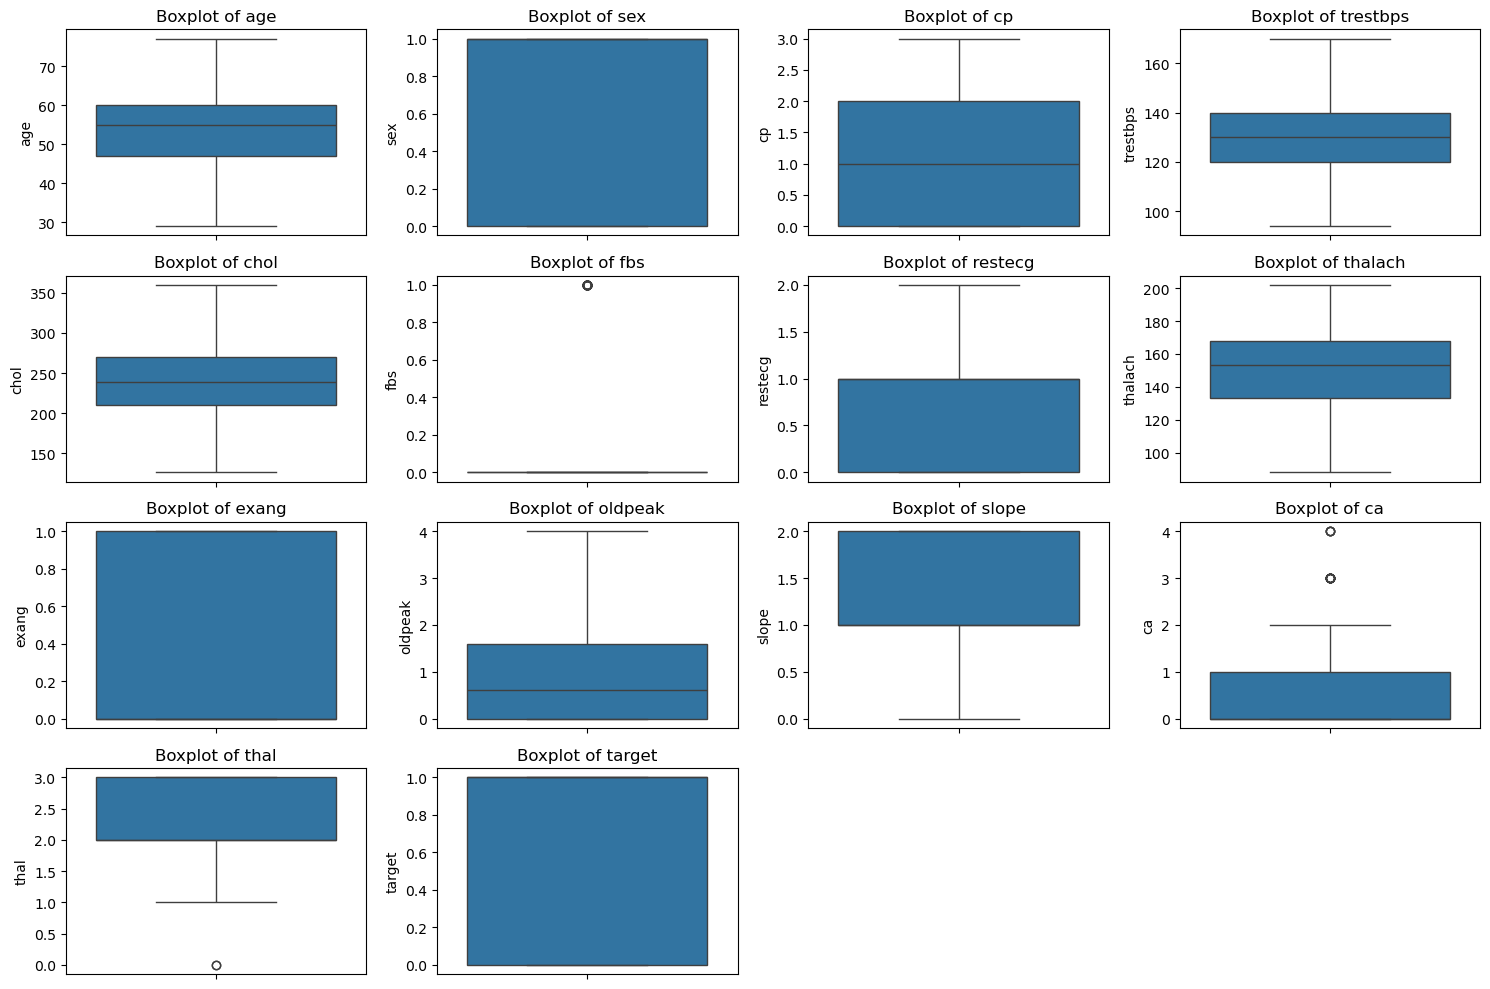

In [158]:
# Plot boxplots for all features to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(heart_disease_outliers_removed.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=heart_disease_outliers_removed[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Data augmentation

In [159]:
# def augment_dataframe(df, num_copies=10):
#     augmented_dataframes = [df]
    
#     for _ in range(num_copies):
#         augmented_df = df.copy()
        
#         # Apply small random changes to numeric columns
#         for col in augmented_df.select_dtypes(include=[np.number]).columns:
#             augmented_df[col] += np.random.uniform(-1, 1, size=augmented_df.shape[0])
#             augmented_df[col] *= np.random.uniform(0.999, 1.001, size=augmented_df.shape[0])
        
#         # Append the augmented DataFrame to the list
#         augmented_dataframes.append(augmented_df)
    
#     # Combine all DataFrames into one
#     combined_df = pd.concat(augmented_dataframes, ignore_index=True)
#     return combined_df

# augmented_df = augment_dataframe(heart_disease_outliers_removed, num_copies=10)

# print(f"Original dataset size: {heart_disease_outliers_removed.shape}")
# print(f"Augmented dataset size: {augmented_df.shape}")


### Data Augmentation using Bootstrapping Method

In [160]:
# Perform bootstrapping to increase the dataset size to 2000 rows
bootstrapped_data = heart_disease_outliers_removed.sample(n=2000, replace=True, random_state=42)

# Check the shape of the bootstrapped data to confirm
bootstrapped_data.shape

(2000, 14)

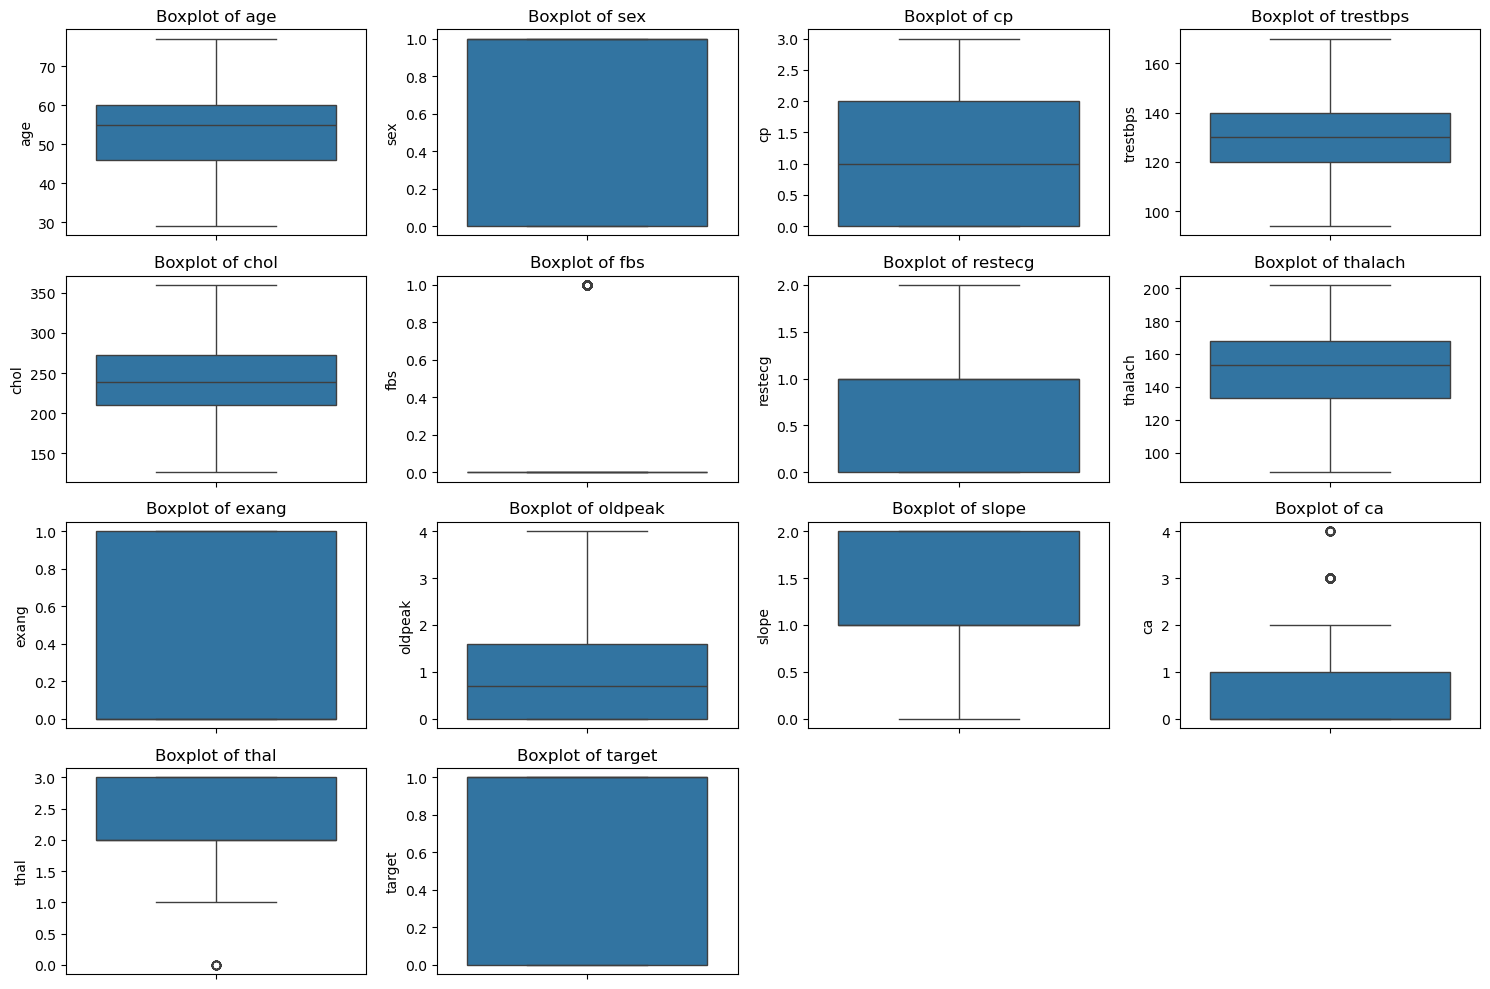

In [161]:
# Plot boxplots for all features to visualize outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(bootstrapped_data.columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=bootstrapped_data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

### Correlation Matrix

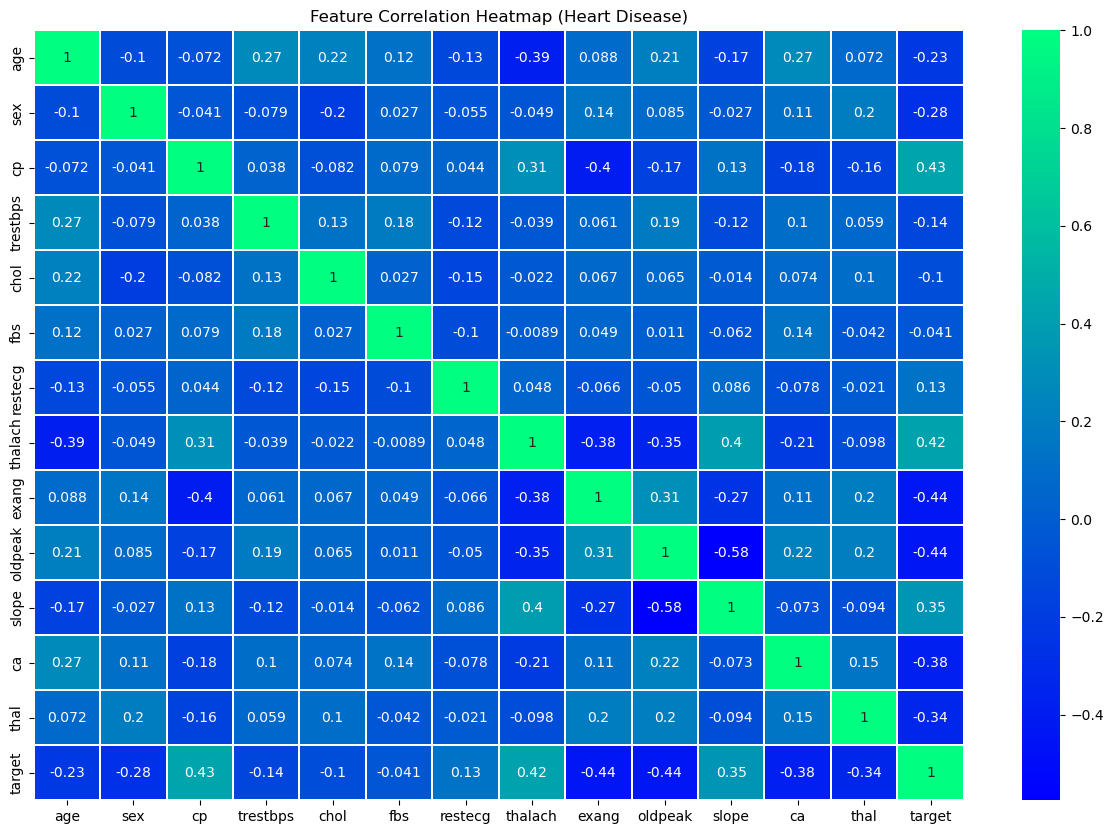

In [162]:
# Compute the correlation matrix
correlation_matrix = heart_disease.corr(method="pearson")

# # Plot the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar=True)
# plt.title("Feature Correlation Heatmap")
# plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,linewidth=.01,annot=True,cmap="winter")
plt.title("Feature Correlation Heatmap (Heart Disease)")
plt.show()
# plt.savefig('correlationfigure')

#### Focus on Relevant Features: 
Look at the correlation between the target column (target) and other features. Select features with a strong correlation (positive or negative). As a general rule:

- Correlation ≥ 0.3 or ≤ -0.3 is often considered meaningful.
- Avoid highly correlated features (multicollinearity).

#### Based on the visual data:

- cp (Chest Pain Type): **Correlation: 0.43 (positive)**
  - Chest pain is a primary symptom of heart disease. Different types of chest pain (e.g., angina, non-anginal pain) are strong indicators of cardiac issues.

- thalach (Maximum Heart Rate Achieved): **Correlation: 0.42 (positive)**
  - Maximum heart rate achieved during physical exertion is a measure of cardiovascular fitness.

- ca (Number of Major Vessels Colored by Fluoroscopy): **Correlation: -0.38 (negative)**
  - Fewer blocked vessels correlate with better heart health, while an increased number correlates with higher risk and severity of heart disease. This explains the negative correlation.

- oldpeak (ST Depression Induced by Exercise Relative to Rest): **Correlation: -0.44 (negative)**
  - ST depression is a key finding in stress tests and indicates ischemia (reduced blood flow to the heart). Higher values of oldpeak signify worse cardiac ischemia and are directly linked to a higher likelihood of heart disease.

- thal (Thalassemia): **Correlation: -0.34 (negative)**
  - Thalassemia refers to genetic abnormalities in hemoglobin. In the context of heart disease, abnormal thal values may reflect underlying issues like stress-induced ischemia or previous heart damage, making it moderately predictive.

- exang (Exercise-Induced Angina): **Correlation: -0.44 (negative)**
  - Exercise-induced angina (chest pain during exercise) is a hallmark symptom of coronary artery disease. If a person experiences angina during physical activity, it indicates that the heart is not receiving adequate blood supply due to narrowed or blocked arteries.

#### Less Relevant Features
- Features like age, sex, chol, fbs, and restecg show weaker correlations (close to 0) and may contribute less to the prediction of the target.

In [167]:
# Keep only relevant features
relevant_features = ['cp', 'thalach', 'ca', 'oldpeak', 'thal', 'exang']
heart_disease_featurized = bootstrapped_data[relevant_features]


### Exploratory Data Analysis - EDA

#### Distribution Plots

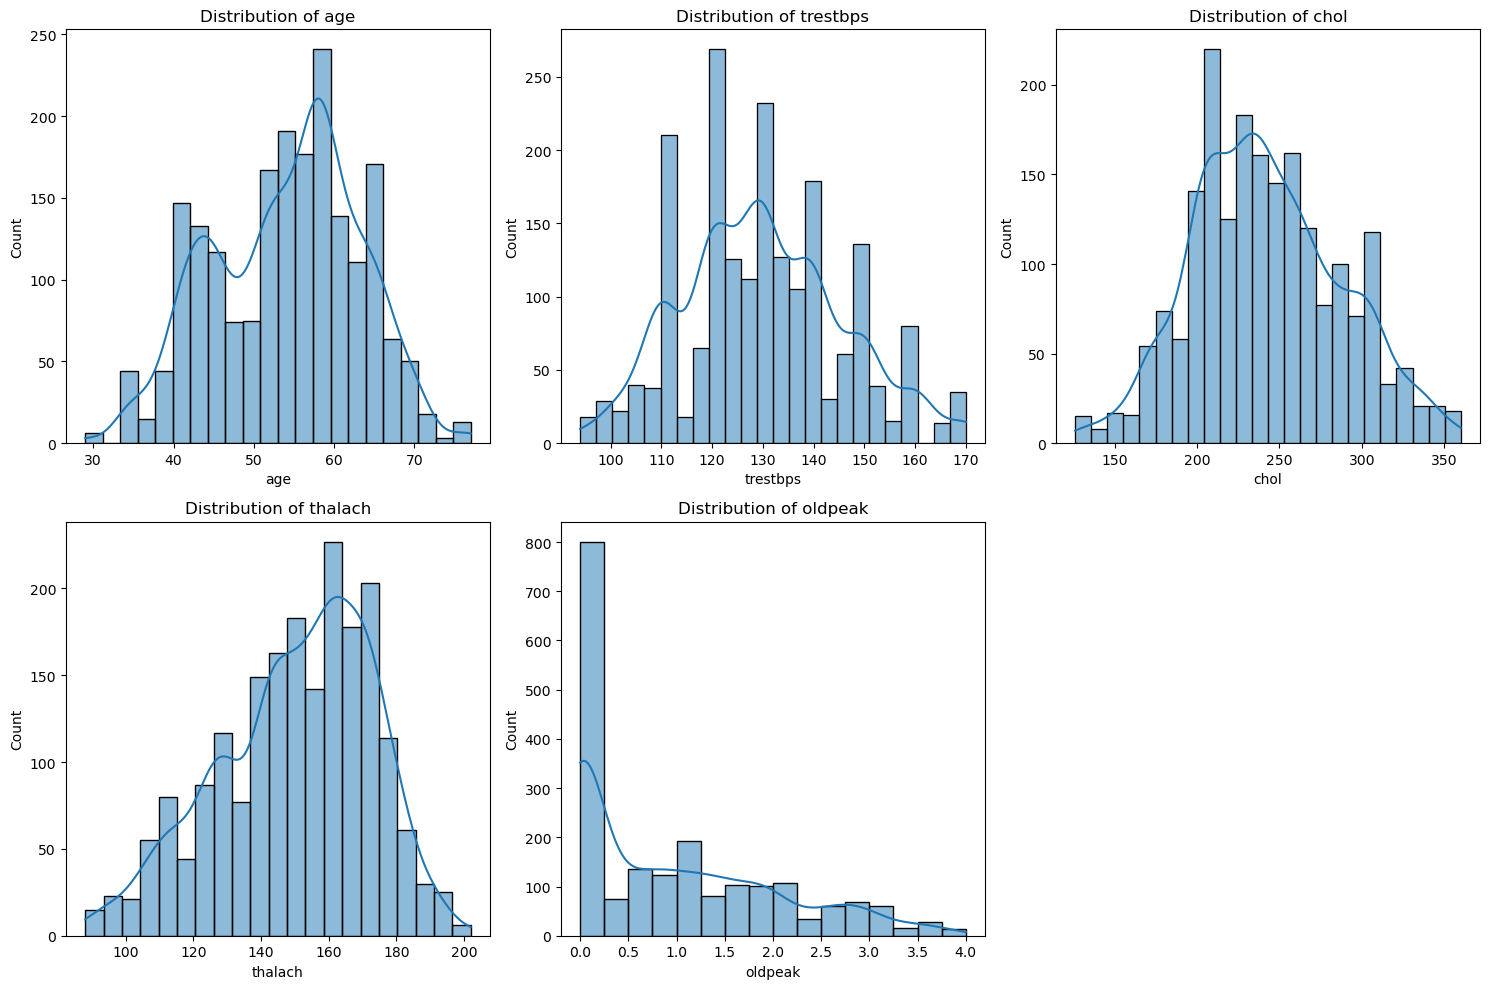

In [169]:
# Plot distribution of key features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(bootstrapped_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

#### Plot boxplots for key features

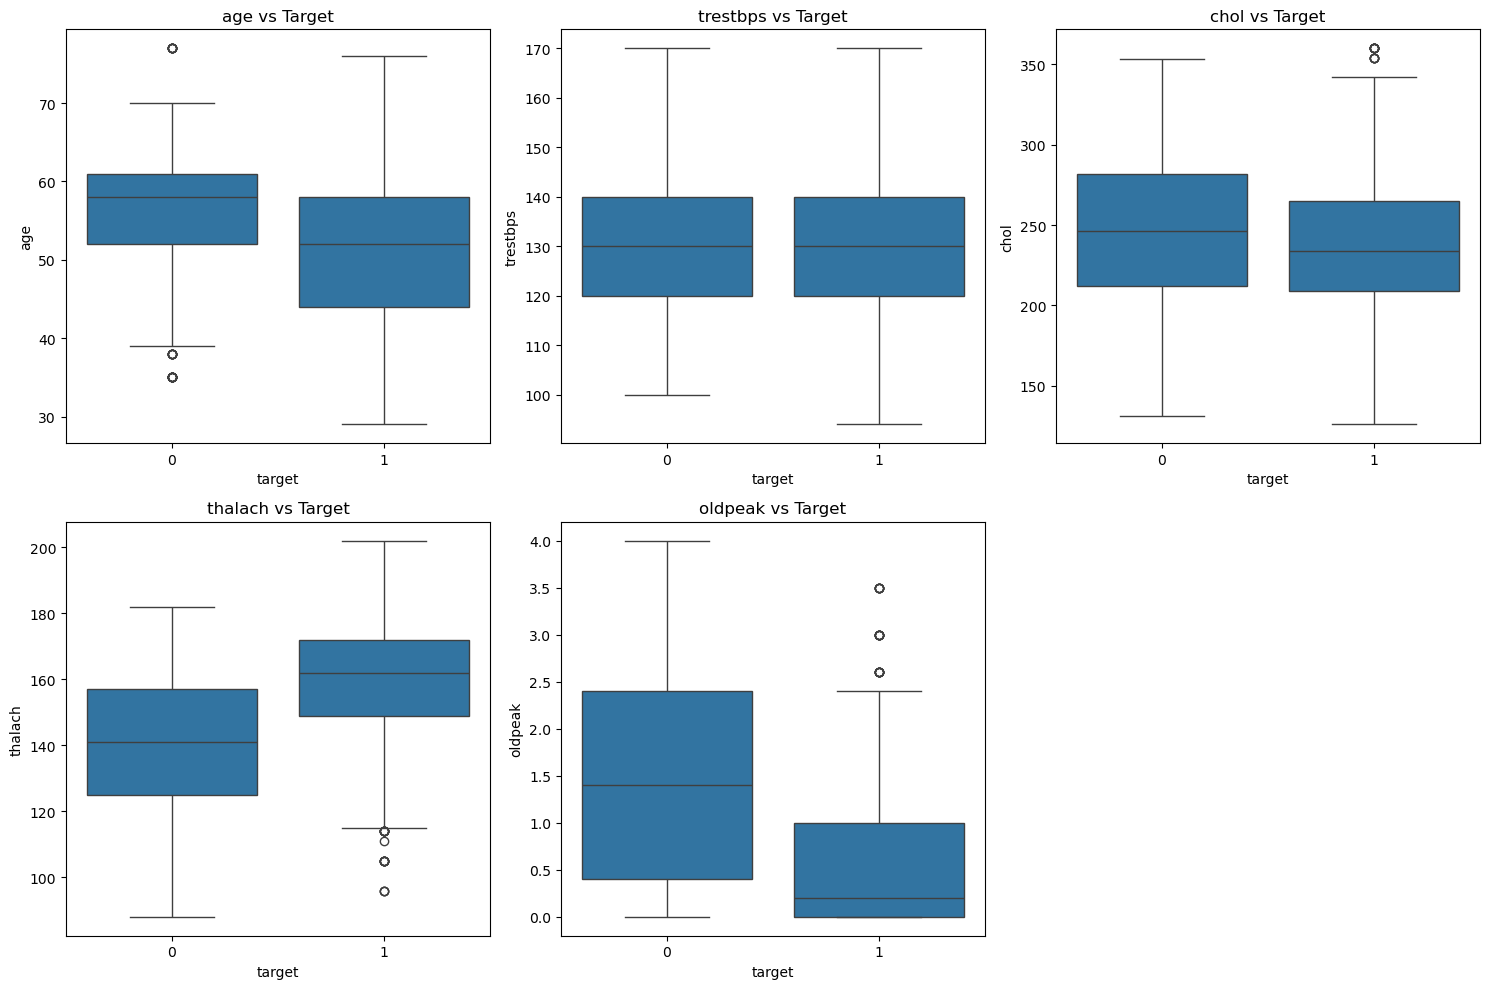

In [170]:
# Plot boxplots for key features against the target variable
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='target', y=feature, data=bootstrapped_data)
    plt.title(f'{feature} vs Target')
plt.tight_layout()
plt.show()

In [171]:
# Save the new dataset
bootstrapped_data.to_csv('../cleaned_datasets/heart-disease-cleaned.csv', index=False)

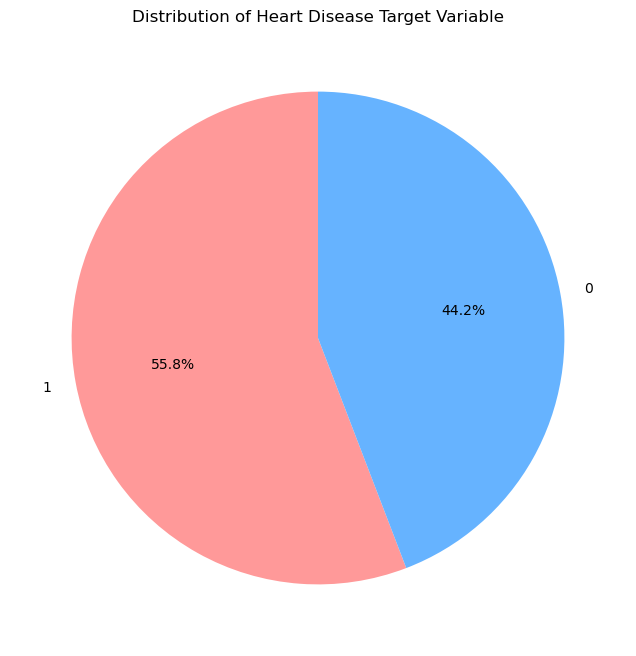

In [22]:
# Plot the target feature in pie chart
plt.figure(figsize=(8, 8))
target_counts = bootstrapped_data['target'].value_counts()
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Heart Disease Target Variable')   
plt.show()